In [1]:
import requests
import spacy
from bs4 import BeautifulSoup
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

Lectura de la pagina web:

In [2]:
def req(pag):
    #Obtengo la pagina con Requests
    web = requests.get(pag)

    #Leo las paginas con Request
    html = web.content.decode()
    
    return html

Procesamiento del texto extraido:

In [3]:
def buscar(html):
    soup = BeautifulSoup(html, 'html.parser')
    a = soup.find_all('p')
    cadena = ""
    for b in a:
        cadena +=" "+ b.text
    return cadena

In [4]:
def todolodemas(cadena):
    #La convierto en un objeto de Spacy     
    nlp = spacy.load('en_core_web_sm')
    text = cadena
    doc = nlp(text) 


    #Tokenizacion
    tokens =[]
    for t in doc:
        tokens.append(t.orth_)

    #Normalizacion
    lex = []
    for t in doc:
        if   (not t.is_punct and 
              not t.is_stop):
            lex.append(t.orth_)

    #Lematizacion
    palabras = []
    for t in lex:
        if len(t)>= 3 and t.isalpha():
            palabras.append(t.lower())

    otras_pv = ["texto"]
    palabras2 =[]
    for texto in palabras:
        if texto not in otras_pv:
            palabras2.append(texto)

    palabras3 = " ".join(palabras2)
    return palabras3

Generación de la nube:

https://en.wikipedia.org/wiki/Python_(programming_language)


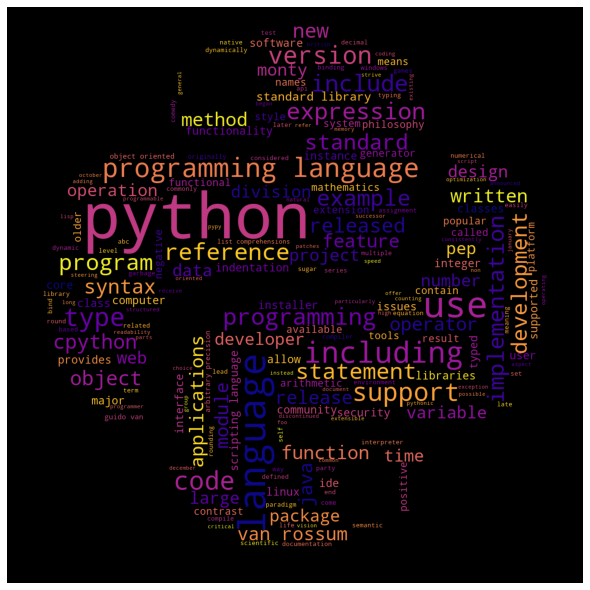

In [5]:
var1 = req(input())
var2 = buscar(var1)
var3 = todolodemas(var2)


#------------------------------------------------------------------------------
#Configuro la mascara de la nube
mask = np.array(Image.open("python.jpg"))
mask[mask == 1] = 255

#Genero la nube
wordcloud = WordCloud(mask = mask, width = 1200, height = 1200,
                      background_color ='black',
                      min_font_size = 10, colormap = 'plasma').generate(var3)
    
#-------------------------------------------------------------------------------    
#Muestra la nube en pantalla 
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()